# Reinforcement Learning - Multi-armed Bandits

Guillaume Bargibant / Гийом Баргибан
based on Reinforcement Learning, Richard S.Sutton and Andrew G. Barto.

## A stationary introduction

Let's consider the following learning problem. You are in front of $k$ different choices. After a choice, you receive a numerical reward depending on the selected action. You repeat this situation multiple times.

Your objective is to maximize the expected total reward over some time period, for example, 1000 action selections (time steps).

### Some notations

We denote the action selected on time step $t$ as $A_t$, and the corresponding reward $R_t$. 
The value of an arbitrary action $a$, denoted $q_*(a)$, is the expected reward by selecting $a$:

$$q_*(a) = \mathbb{E}[R_t | A_t=a]$$

$q_*(a)$ is unknowned, so we would like to find the estimated value of action $a$ at time step $t$, $Q_t(a)$, so that $Q_t(a)$ is close to $q_*(a)$.
For example, we could average the rewards actually received.


### The exploitation/exploration trade-off

Let's imagine that we have an estimation $Q_t$ of $q_*$, then one action gives a maximum estimated value. So, we could keep selecting this action, that is to say exploiting this action, because it seems to be the best with our current knowledge. This is called a greedy action. 

Or, we could try another action, because we have not enough knowledge about its estimated value, and hence explore the other options, even if we could have a poorer reward.

These two strategies are in conflict, we should then find a trade-off to optimise the total reward, by exploiting the best actions so far, and by exploring to maybe find better actions. 

An easy solution is the $\epsilon$-greedy method. It consists of choosing the best action according to the estimated values with probability $1-\epsilon$, or a random action with probability $\epsilon$.

### Estimating the action value

A natural way to estimate $q_*$ is to average the received rewards. If we consider a single action, we can denote by $R_i$ the reward received after $i$ selection of this action, and $Q_n$ the estimate of its action value after $n-1$ selections, so:
$$Q_n = \frac{R_1+R_2+...+R_{n-1}}{n-1}$$

This leads to the given formula:

$$Q_{n+1} = Q_n + \frac{1}{n}[R_n-Q_n]$$

Where $\frac{1}{n}$ corresponds to a step size, and $R_n - Q_n$ corresponds to a correction toward the value pointed by the new reward. 

### A 10-armed bandit example

Let's generate an instance of this problem:

Here, $q_*(a)$ is selected according to a uniform distribution. The associated reward is simply given by a gaussian distribution with mean $q_*(a)$ and standard deviation 1.

Here are the functions that we will use:

In [66]:
import numpy as np
import matplotlib.pyplot as plt


def generateQstar(k):
    '''
    returns a list of k mean rewards.
    '''
    return np.random.uniform(low=-3, high=3, size=k)


qstar = generateQstar(10)

print("Example of qstar:", qstar)

def bandit(qstar, A):
    '''
    returns a reward based on the action values
    qstar(a) after selection action A.
    '''
    return np.random.normal(qstar[A], 1)

print("Example of reward:", bandit(qstar, 3))

def simpleBanditAlgorithm(k, qstar, epsilon, steps):
    '''
    Realize the bandit algorithm with epsilon-greedy method for multiple steps.
    Returns Q: the estimate values, N: the number of time each action has been selected, 
    and actions: the actions taken during the execution of the algorithm.
    '''
    Q = np.zeros(k)
    N = np.zeros(k)
    actions = np.zeros(steps)
    for i in range(steps):
        if np.random.binomial(1,epsilon,1):
            A = np.random.randint(0, k-1)
        else:
            A = np.argmax(Q)
        R = bandit(qstar, A)
        N[A] = N[A]+1
        Q[A] = Q[A]+(1/N[A])*(R-Q[A])
        actions[i] = A
    return Q, N, actions

Example of qstar: [ 1.80055475 -0.40339431  1.07270208  2.4645158   1.45910176 -1.35070642
 -2.75514432  2.30925182 -2.7793654   0.527392  ]
Example of reward: 2.655499730383681


#### Example

Let's generate an instance of this problem, and watch the selected actions.

Actual best action to take:  1


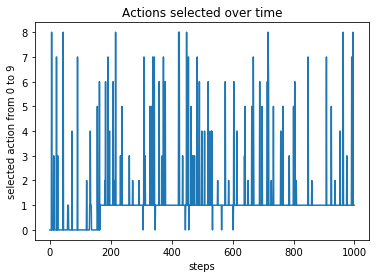

qstar      :  [ 2.32212229  2.90042746  0.94875392  1.32454777 -0.10239678 -2.23193971
 -2.61488504 -1.46598045  1.04440221  2.39526916]
estimation : [ 2.45423683  2.88034881  0.9885945   1.4176833  -0.29605184 -2.31971531
 -2.33977168 -1.48907707  1.38003687  0.        ]


In [73]:
k=10
steps = 1000
epsilon = 0.1
qstar = generateQstar(k)
Q, N, actions = simpleBanditAlgorithm(k, qstar, epsilon, steps)

print("Actual best action to take: ", np.argmax(qstar))
fig, ax = plt.subplots()
ax.plot(actions)
ax.set(xlabel = 'steps', ylabel='selected action from 0 to 9',
      title='Actions selected over time')
plt.show()

print("qstar      : ", qstar)
print("estimation :", Q)

Although the plot is messy, we can observe a plateau at the actual best action to take, which indicates that the algorithm will mostly choose this action, but exploration goes on.

$q_*$ and $Q$ are also pretty close, which confirms that the algorithm learns.

For better reading and evaluation, we could plot the percentage of optimal actions that are selected, averaged over multiple instances of the 10-armed bandit problem.

Also, we will do it for different values of $\epsilon$ to see its effect.

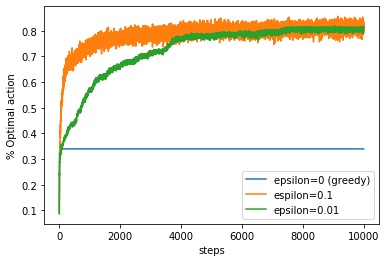

In [80]:
#Simple bandit algorithm
numberInstances = 300

k = 10
steps = 10000
epsilons = [0,0.1,0.01]

def averagedBanditAlgorithm(numberInstances, epsilon, k, steps):
    '''
    returns a matrix of all the boolean vectors of 
    optimal actions taken at each time step.
    '''
    results = np.zeros((numberInstances, steps))
    for t in range(numberInstances):
        qstar = generateQstar(k)
        optimalAction = np.argmax(qstar)
        Q, N, actions = simpleBanditAlgorithm(k, qstar, epsilon, steps)
        optimalActions = (actions==optimalAction)
        results[t]=optimalActions
    return results

fig, ax = plt.subplots()
for epsilon in epsilons:
    results = averagedBanditAlgorithm(numberInstances, epsilon, k, steps)
    avg = np.average(results, axis=0)
    ax.plot(avg)
    
ax.set(xlabel='steps', ylabel='% Optimal action')
plt.legend(['epsilon=0 (greedy)', 'espilon=0.1', 'epsilon=0.01'], loc='lower right')
plt.show()

First, the greedy method ($\epsilon=0$) found the optimal action in 

The $\epsilon$-method first works poorly, as it has sometimes found the optimal value, but then manages to find the optimal value.
Although the $\epsilon = 0.1$ method finds the value quicker than the $\epsilon = 0.01$  , at some point, the latter will have better performance, since it will exploit more the best estimated value.

With this first introduction example, we managed to enlight some aspects of reinforcement learning for a simple case, such as the needs of a balance between exploration and exploitation.

## Let's track a Nonstationary Problem

In the previous example, we used the average of rewards to estimate the action values. This method is well suited for stationary bandit problems, where $q_*$ is constant.
But it is possible that these values changes overtime. For example, the average temperature outside is lower on winter, so we should decide not to go out on winter, if temperature is considered as a reward.
We should in fact put more weight to recent rewards than to long-past rewards.

One popular way to do so, is to replace the step-size parameter by a constant:

$$ Q_{n+1} = Q_n + \alpha[R_n - Q_n] $$.

It can be proven that by doing so, we obtain an exponential-recency average, which means that the rewards are weighted by a decreasing exponential function after each time step.
Also, this method conserves the information about the first estimate value $Q_1$, which is not what we want.

#### Another step-size 
For the sake of doing some mathematics, let's use the following step size:
$$\beta_n = \alpha / \bar{o_n},$$
where $\alpha$ is a conventional constant step size, and $\bar{o_n}$ is a trace of one that starts at 0, so that:

$$\bar{o}_n = \bar{o}_{n-1} + \alpha(1-\bar{o}_{n-1}), \bar{o_0}=0, n\geq 0$$.

Let's demonstrate that with this step-size, $Q_n$ is an exponential recency-weighted average without initial bias.

##### General formula for not constant step-size $\alpha_n$ 

Let's suppose that we have a non constant step-size $\alpha_n$.

Then, we have:

$$\begin{split}
    Q_{n+1} & = Q_n + \alpha_n [R_n - Q_n] \\
    & = \alpha_n R_n +(1-\alpha_n)Q_n \\
    & = \alpha_n R_n +(1-\alpha_n)[\alpha_{n-1} R_{n-1} +(1-\alpha_{n-1})Q_{n-1}] \\
    & = \alpha_n R_n + (1-\alpha_n)\alpha_{n-1}R_{n-1} + (1-\alpha_n)(1-\alpha_{n-1})Q_{n-1} \\
    &= \sum_{i=1}^n (\prod_{j=i+1}^{n}(1-\alpha_j)) \alpha_i R_i + 
    \prod_{i=1}^n{ (1-\alpha_i)}\times Q_1
\end{split}
$$

##### $Q_n$ is without initial bias

We just have to demonstrate, according to the general formula, that:

$$\prod_{i=1}^n{ (1-\beta_i)} = 0$$.

Let's simply replace $\beta_i$ by its definition:

$$\begin{split}
    \prod_{i=1}^n{(1-\beta_i)} &= \prod_{i=1}^n{ (1-\frac{\alpha}{\bar{o}_i}) } \\
    &= \prod_{i=1}^n{(\frac{\bar{o}_i -\alpha}{\bar{o}_i})} \\
    &= \prod_{i=1}^n{(\frac{\bar{o}_{i-1} -\alpha\bar{o}_{i-1}}{\bar{o}_i})} \\
    &= (1-\alpha)^n \prod_{i=1}^n { \frac{\bar{o}_{i-1}}{\bar{o}_i} } \\
    &= 0,
\end{split} 
$$

because $\bar{o}_0 = 0$

Hence, $Q_n$ is without initial bias.

##### $Q_n$ is an exponential recency-weighted average

Let's replace $\beta_i$ in the general formula:

$$\begin{split}
\sum_{i=1}^n (\prod_{j=i+1}^{n}(1-\beta_j)) \beta_i R_i &= \sum_{i=1}^n (\prod_{j=i+1}^{n}(1-\frac{\alpha}{\bar{o}_j})) \frac{\alpha}{\bar{o}_i} R_i 
\end{split}
$$

We can use the previous computation to show that it is equal to:

$$\begin{split}
\sum_{i=1}^n (\prod_{j=i+1}^{n}(1-\beta_j)) \beta_i R_i &= \sum_{i=1}^n (1- \alpha)^{n-i}(\prod_{j=i+1}^{n}\frac{\bar{o}_{j-1}}{\bar{o}_j}) \frac{\alpha}{\bar{o}_i} R_i \\
&= \sum_{i=1}^n (1- \alpha)^{n-i}\frac{\bar{o}_{i}}{\bar{o}_n} \frac{\alpha}{\bar{o}_i} R_i \\
&=  \sum_{i=1}^n \frac{\alpha}{\bar{o}_n} (1- \alpha)^{n-i} R_i \\ 
\end{split}
$$

Since $1-\alpha < 1$, it will converge towards 0 when $n-i$ increases, that is, the long-past rewards will have less effect than the recent ones.

We finally just have to check that it is a weighted average, so $\sum_{i=1}^n \frac{\alpha}{\bar{o}_n} (1- \alpha)^{n-i} = 1$

Or, it's a simple geometrical sum, so we have:


$$
\begin{split}
\sum_{i=1}^n \frac{\alpha}{\bar{o}_n} (1- \alpha)^{n-i} &= \frac{\alpha}{\bar{o}_n}  (1- \alpha)^n \frac{1}{\alpha} (1-\frac{1}{(1-\alpha)^n}) \\
&= \frac{(1-\alpha)^n-1}{\bar{o}_n}
\end{split}
$$

Now, we have to notice that $(\bar{o}_n)$ is an arithmetico-geometrical sequence, indeed:
$$
\begin{split}
\bar{o}_n &= \bar{o}_{n-1} + \alpha (1-\bar{o}_{n-1}) \\
 &= (1-\alpha) \bar{o}_{n-1} + \alpha 
\end{split}
$$

So we have this equality:

$$
\begin{split}
\bar{o}_n &= (1-\alpha)^n (\bar{o}_{0}-r) + r \\
&= ((1-\alpha)^n-1)r 
\end{split}
$$

where $r = \frac{\alpha}{1-(1-\alpha)} = 1$

So, 

$$\bar{o}_n = ((1-\alpha)^n-1)$$

And we finally managed to prove that $\sum_{i=1}^n \frac{\alpha}{\bar{o}_n} (1- \alpha)^{n-i} = 1$.

Hence, $Q_n$ is indeed an exponential recency-weighted average.

##### Now, let's implement and compare the average rewards and this step-size on a non-stationary example

To simulate non-stationarity, we will start with all $q_*(a)=0$, and then they will take random walks, by a adding a normally distributed increment with mean zero and standard deviation 0.01 on each step. 
We will plot the same kind of figure as before, hoping for the new step-size to be efficient.

In [92]:
def updateQstar(qstar):
    '''
    Returns updated action values
    '''
    return qstar + np.random.normal(0, 0.01, 10)


def nonStationaryBandit(k, qstar, epsilon, steps, alpha, boolStepSize):
    '''
    Realize the bandit algorithm with epsilon-greedy method with a non stationary qstar
    and different step sizes.
    '''
    qstar = np.zeros(k)
    omicron = alpha 
    Q = np.zeros(k)
    N = np.zeros(k)
    actions = np.zeros(steps)
    for i in range(steps):
        if np.random.binomial(1,epsilon,1):
            A = np.random.randint(0, k-1)
        else:
            A = np.argmax(Q)
        R = bandit(qstar, A)
        N[A] = N[A]+1 
        if not boolStepSize: #Average method
            Q[A] = Q[A]+(1/N[A])*(R-Q[A])
        else: #New step size method
            Q[A] = Q[A]+alpha/omicron*(R-Q[A])
        omicron = omicron + alpha*(1-omicron)
        actions[i] = A == np.argmax(qstar)
        qstar = updateQstar(qstar)
    return Q, N, actions

def nonStationaryAverageBandit(numberInstances, epsilon, k, steps, alpha, boolStepSize):
    '''
    returns a matrix of all the boolean vectors of 
    optimal actions taken at each time step for the non-stationary problem.
    '''
    results = np.zeros((numberInstances, steps))
    for t in range(numberInstances):
        Q, N, actions = nonStationaryBandit(k, qstar, epsilon, steps, alpha, boolStepSize)
        results[t]=actions
    return results

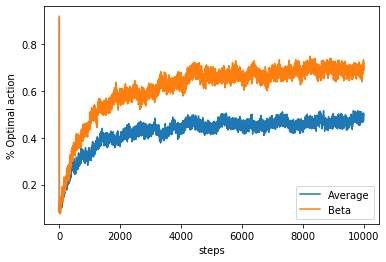

In [100]:
fig, ax = plt.subplots()
numberInstances = 400
k = 10
steps = 10000
epsilon = 0.1
alpha = 0.1

for boolean in [False, True]:
    results = nonStationaryAverageBandit(numberInstances, epsilon, k, steps, alpha, boolean)
    avg = np.average(results, axis=0)
    ax.plot(avg)
    
ax.set(xlabel='steps', ylabel='% Optimal action')
plt.legend(['Average', 'Beta'], loc='lower right')
plt.show()

This figure indicates that the $\beta_n$ step-size performs well on non-stationary problem, when the average values fails to update its estimated values for a huge number of steps, hence, is slower and inefficient.

However, we can see that the average values may work better in the beginning of the experience, because it uses all its knowledge to predict the best action, and these actions are still close to the beginning.

### Conclusion

With these introductory exercises, we got some depth on the Reinforcement Learning problematics, which are how to balance exploration and exploitation, how some methods work best depending on the task, that each method brings parameters that should be tuned.

Despite the simplicity of this problem, a lot of solutions gives different results.

Also, we can imagine some limitations to this problem. Indeed, it doesn't take into account the situations. Image that if we select one action A, then it causes the death of the player. The previous algoritm, if A has a great estimated value, will not take into account the possibility of death, and so... we are pretty sure to be dead!

These issues can be tackled with Markov Decision Processes, which are the next subject of this study.
